Saving a.karavi-300x300-1.jpg to a.karavi-300x300-1.jpg


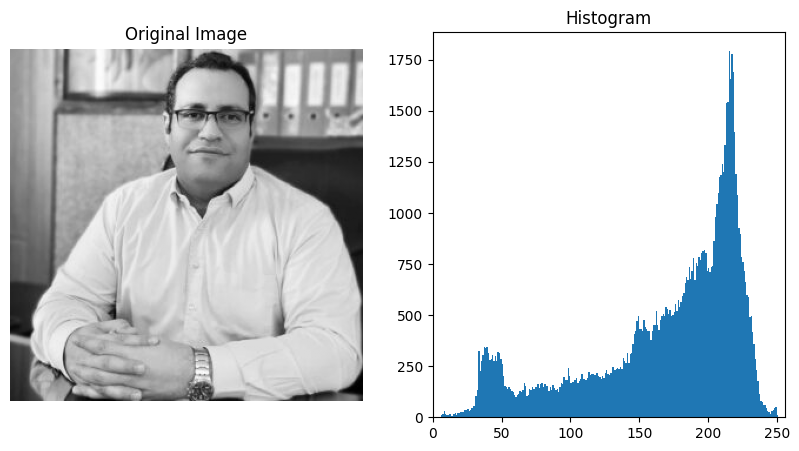

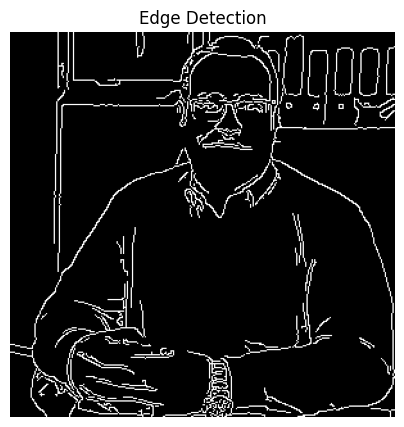

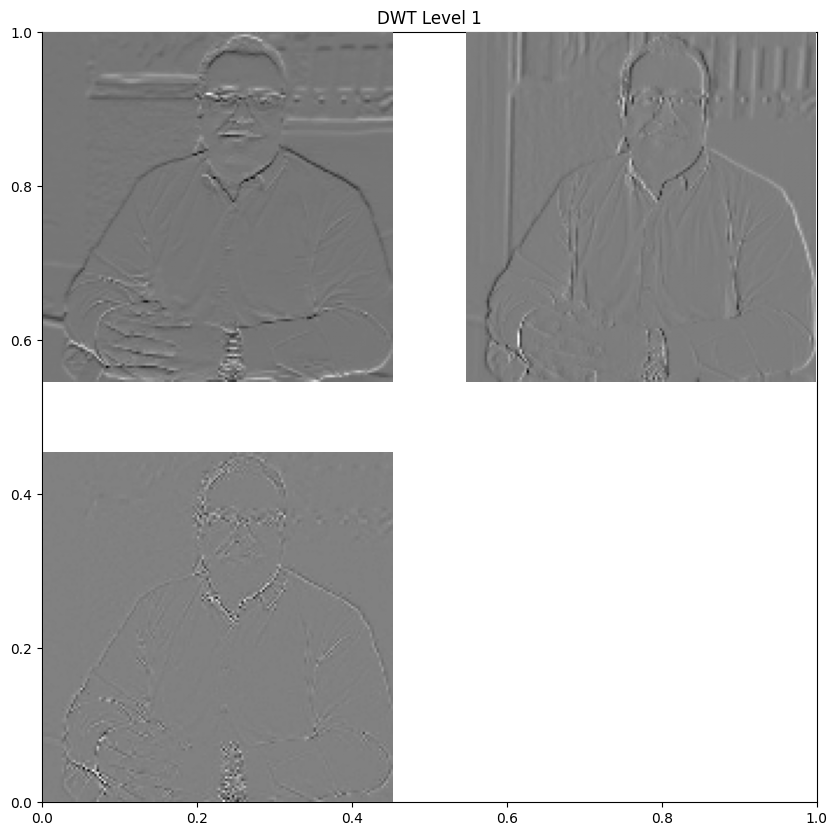

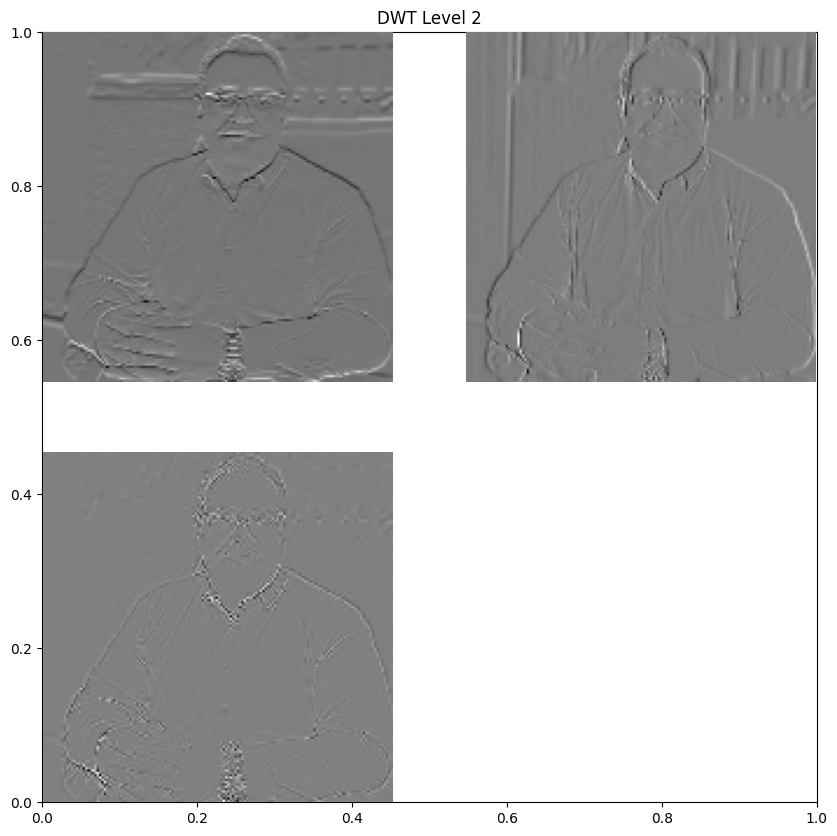

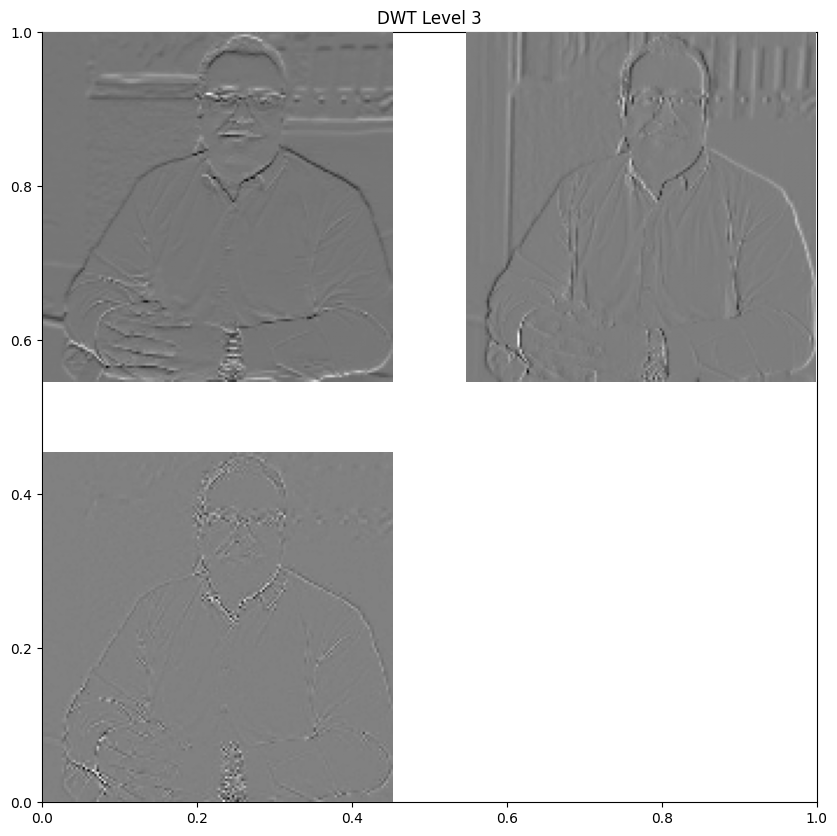

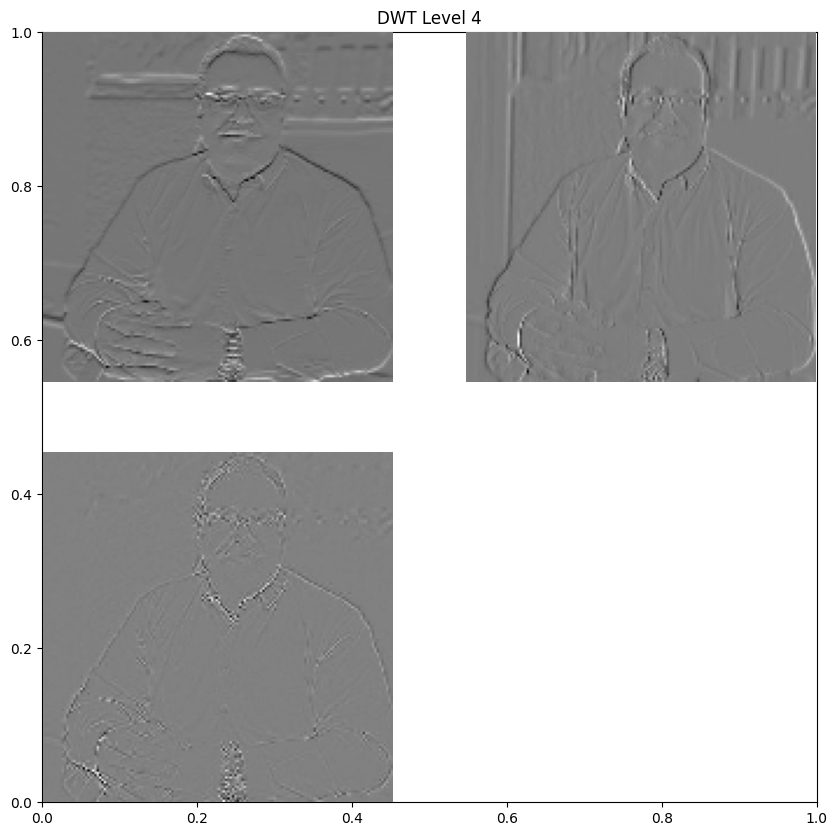

In [2]:
# نصب کتابخانه‌های مورد نیاز
!pip install opencv-python
!pip install pywavelets
!pip install matplotlib

import cv2
import numpy as np
import pywt
import matplotlib.pyplot as plt

# بارگذاری تصویر
from google.colab import files
uploaded = files.upload()

# تصویر را بخوانید
image_path = next(iter(uploaded))
image = cv2.imread(image_path)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# بلاک بندی تصویر
def block_image(image, block_size):
    h, w = image.shape
    blocks = []
    for i in range(0, h, block_size):
        for j in range(0, w, block_size):
            block = image[i:i+block_size, j:j+block_size]
            blocks.append(block)
    return blocks

block_size = 32  # اندازه بلاک
blocks = block_image(image_gray, block_size)

# هیستوگرام تصویر
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image_gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Histogram')
plt.hist(image_gray.ravel(), bins=256, range=[0, 256])
plt.xlim([0, 256])
plt.show()

# استخراج لبه‌های تصویر
edges = cv2.Canny(image_gray, 100, 200)

plt.figure(figsize=(5, 5))
plt.title('Edge Detection')
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.show()

# DWT
def dwt_decomposition(image, level):
    coeffs = pywt.wavedec2(image, 'haar', level=level)
    return coeffs

# اعمال DWT برای سطوح مختلف
dwt_results = {}
for level in range(1, 5):
    dwt_results[level] = dwt_decomposition(image_gray, level)

# نمایش DWT نتایج
for level, coeffs in dwt_results.items():
    plt.figure(figsize=(10, 10))
    plt.title(f'DWT Level {level}')
    for i, coeff in enumerate(coeffs):
        if isinstance(coeff, tuple):
            for j, sub_coeff in enumerate(coeff):
                plt.subplot(2, 2, j + 1)
                plt.imshow(sub_coeff, cmap='gray')
                plt.axis('off')
        else:
            plt.subplot(2, 2, i + 1)
            plt.imshow(coeff, cmap='gray')
            plt.axis('off')
    plt.show()